### Упражнение 1

* Реализуйте функцию `plot_horizontal_bar`, рисующую горизонтальные bar'ы

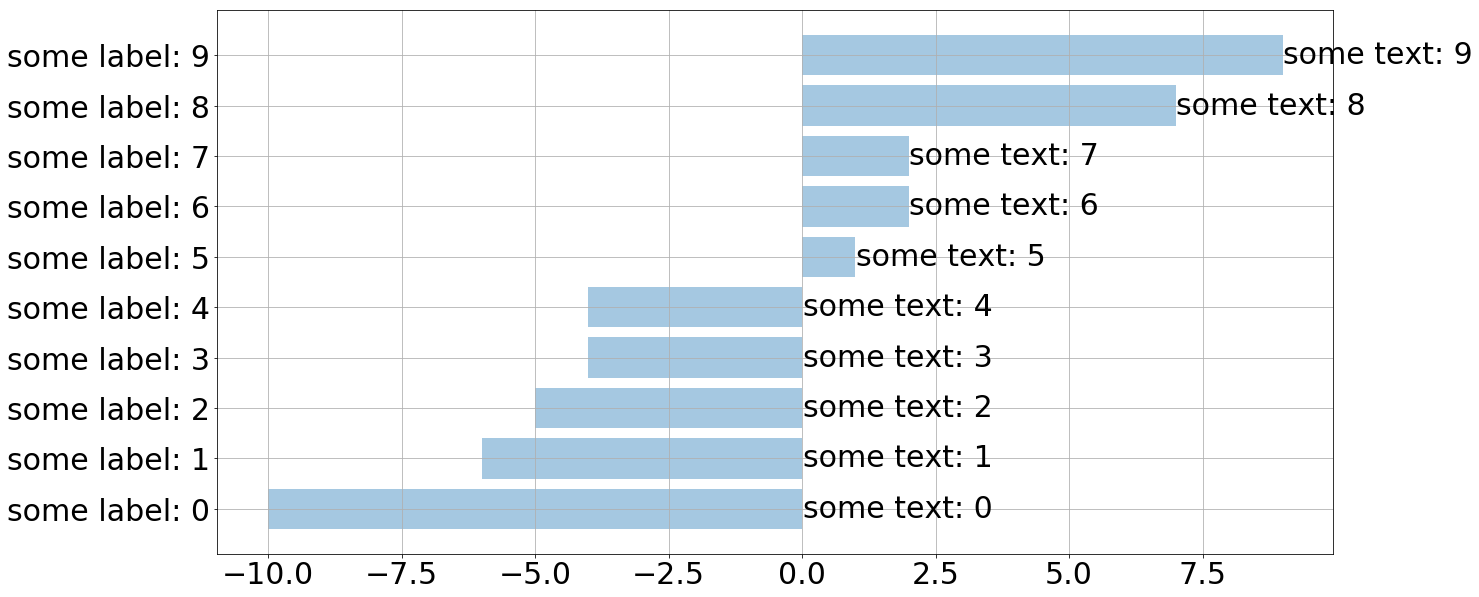

In [1]:
# Сигнатура функции и пример вывода:

bars_length = np.random.randint(-10, 10, 10)
bars_length.sort()

yticks_labels = ['some label: {}'.format(i) for i in range(10)]
labels = ['some text: {}'.format(i) for i in range(10)]
figsize = (20, 10)

plot_horizontal_bar(bars_length, labels, yticks_labels, figsize)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
bars_length = np.random.randint(-10, 10, 10)
bars_length.sort()

yticks_labels = ['some label: {}'.format(i) for i in range(10)]
labels = ['some text: {}'.format(i) for i in range(10)]
figsize = (20, 10)

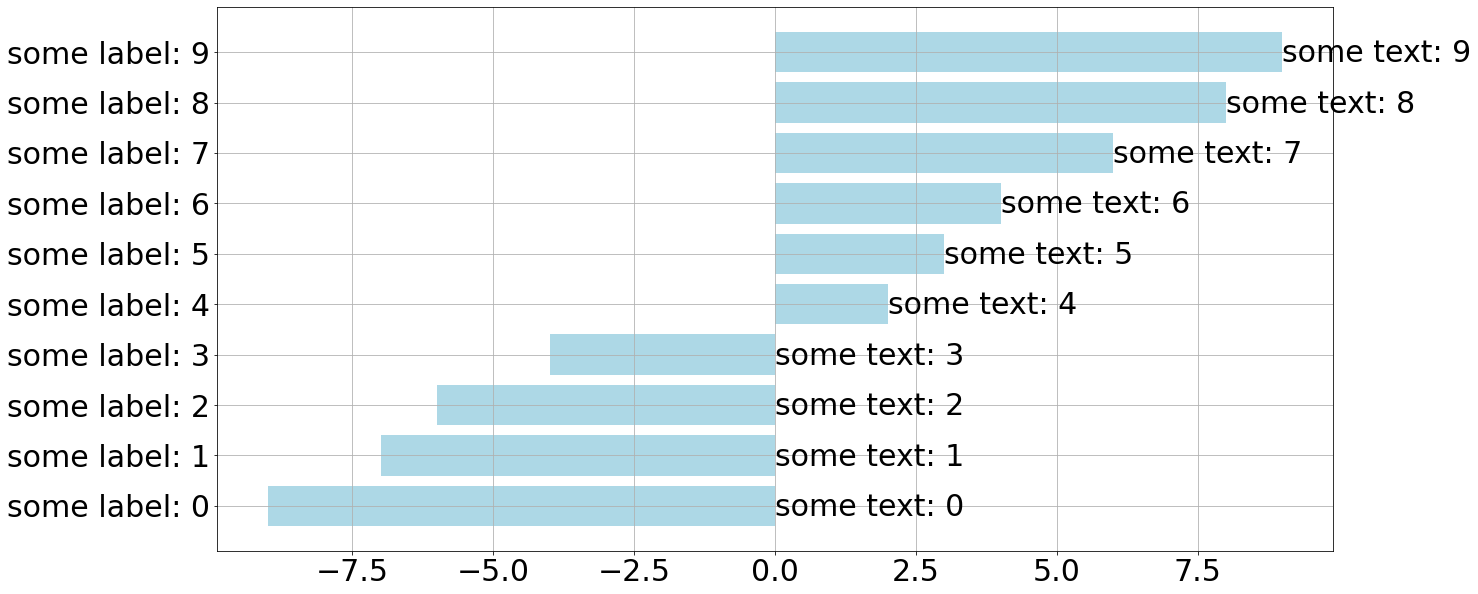

In [3]:
def plot_horizontal_bar(bars_length, labels, yticks_labels, figsize):
    plt.figure(figsize=figsize)
    ax = plt.gca()
    
#     fig, ax = plt.subplots()

    y_pos = np.arange(len(bars_length))

    ax.figsize=(20, 10)
    ax.barh(y_pos, bars_length,  align='center', color = 'lightblue')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(yticks_labels, size = 30)

    ax.grid(True)
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(30) 
    
    
    for i in range(len(bars_length)):
        ax.annotate(labels[i], xy=(1,1), xytext=(max(0,bars_length[i]), i-0.2), size=30)
    
    plt.show()
    
    
plot_horizontal_bar(bars_length, labels, yticks_labels, figsize)

### Упражнение 2

* Реализуйте функцию `plot_time_probabilities`, рисующую изменяющиеся во времени вероятности неких событий.
* Cобытия для нас имеют тональность (от плохого к хорошему). Отразите ее на графике с помощью градиента по цвету.

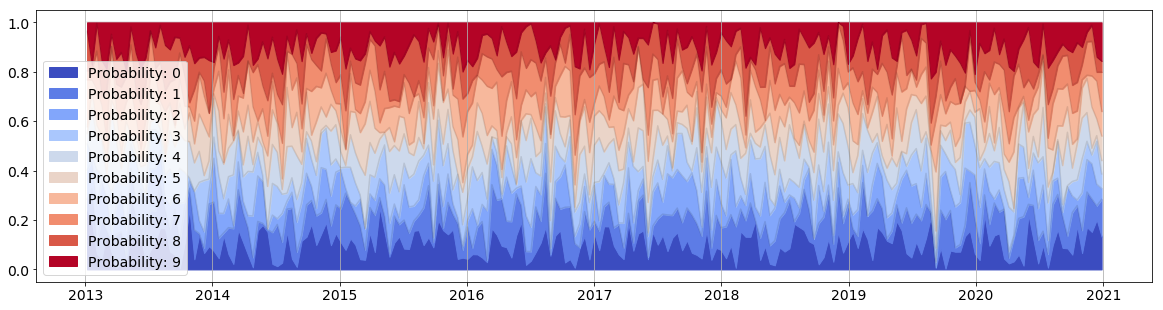

In [2]:
# Сигнатура функции и пример вывода:

dti = pd.date_range('2013-01-01', '2020-12-31', freq='2W')
probabilities_in_time = np.random.random((10, len(dti)))
probabilities_in_time = probabilities_in_time / probabilities_in_time.sum(axis=0)
probabilities_in_time = pd.DataFrame(probabilities_in_time).T
probabilities_in_time.index = dti
figsize = (20, 5)

plot_time_probabilities(probabilities_in_time, figsize)

In [4]:
import pandas as pd

In [5]:
# Сигнатура функции и пример вывода:


dti = pd.date_range('2013-01-01', '2020-12-31', freq='2W')
probabilities_in_time = np.random.random((10, len(dti)))
probabilities_in_time = probabilities_in_time / probabilities_in_time.sum(axis=0)
probabilities_in_time = pd.DataFrame(probabilities_in_time).T
probabilities_in_time.index = dti
figsize = (20, 5)

In [7]:
probabilities_in_time

,0,1,2,3,4,5,6,7,8,9
2013-01-06,0.057027,0.144637,0.163389,0.194382,0.129068,0.101255,0.018814,0.052079,0.075596,0.063753
2013-01-20,0.112784,0.142387,0.126389,0.134792,0.074173,0.010759,0.139846,0.108617,0.123837,0.026414
2013-02-03,0.065175,0.112052,0.136928,0.052867,0.024440,0.090054,0.110522,0.009479,0.133156,0.265329
2013-02-17,0.126029,0.148395,0.146053,0.060950,0.088871,0.075714,0.032631,0.062338,0.119001,0.140018
2013-03-03,0.118350,0.132220,0.062644,0.066966,0.049919,0.117307,0.122963,0.143904,0.110737,0.074990
...,...,...,...,...,...,...,...,...,...,...
2020-11-01,0.098181,0.142392,0.213278,0.062593,0.107912,0.158946,0.009948,0.071642,0.061654,0.073455
2020-11-15,0.083397,0.033817,0.116023,0.062287,0.068197,0.137542,0.115130,0.171554,0.123344,0.088707
2020-11-29,0.063499,0.122658,0.195401,0.057208,0.113679,0.063007,0.133190,0.019285,0.131156,0.100918
2020-12-13,0.193658,0.121876,0.159831,0.024422,0.033189,0.120030,0.126861,0.037649,0.102807,0.079676


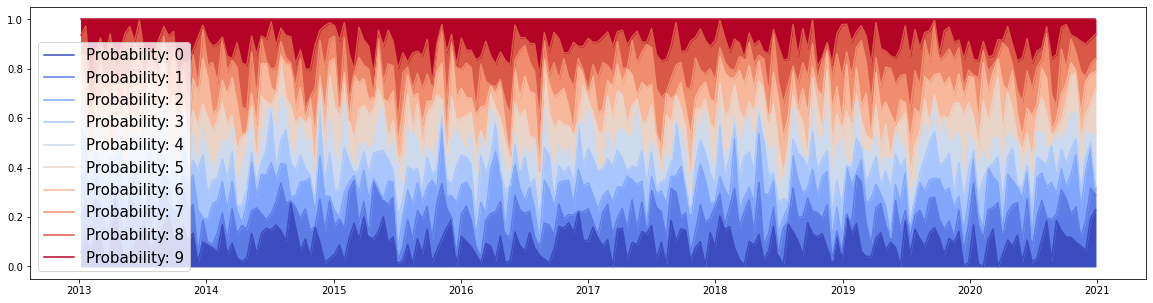

In [8]:
def plot_time_probabilities(probabilities_in_time, figsize):
    plt.figure(figsize=figsize)
    ax = plt.gca()
    cmap = plt.cm.coolwarm(np.linspace(0, 1, 10))
    
    cur = probabilities_in_time[0]
    plt.plot(cur, color = cmap[0], label = "Probability: "+str(0))
    plt.fill_between(probabilities_in_time.index,  cur, color = cmap[0]) # заполняем цветом
    
    for i  in range(1,10):
        cur_new = cur + probabilities_in_time[i]
        
        plt.plot(cur_new, color = cmap[i], label = "Probability: "+str(i))
        plt.fill_between(probabilities_in_time.index, cur,cur_new, color = cmap[i]) # заполняем цветом
        
        cur = cur_new
    
    
    plt.legend(loc='lower left', prop={'size':15})
    
    plt.show()
    
plot_time_probabilities(probabilities_in_time, figsize)    

In [9]:
cmap = plt.cm.coolwarm(np.linspace(0, 1, 10))
cmap

array([[0.2298057 , 0.29871797, 0.75368315, 1.        ],
       [0.3634608 , 0.48478368, 0.90101889, 1.        ],
       [0.51082432, 0.64939661, 0.98507878, 1.        ],
       [0.66725292, 0.77917646, 0.99295921, 1.        ],
       [0.80496476, 0.85166616, 0.92616507, 1.        ],
       [0.91937599, 0.83127272, 0.78287363, 1.        ],
       [0.9682034 , 0.7208441 , 0.61229299, 1.        ],
       [0.94405457, 0.55315348, 0.43554849, 1.        ],
       [0.85237814, 0.34649195, 0.28034647, 1.        ],
       [0.70567316, 0.01555616, 0.15023281, 1.        ]])

### Упражнение 3
 
* Реализуйте функцию `plot_intraday_ts`, рисующую тепловую карту по временному ряду с внутридневными данными

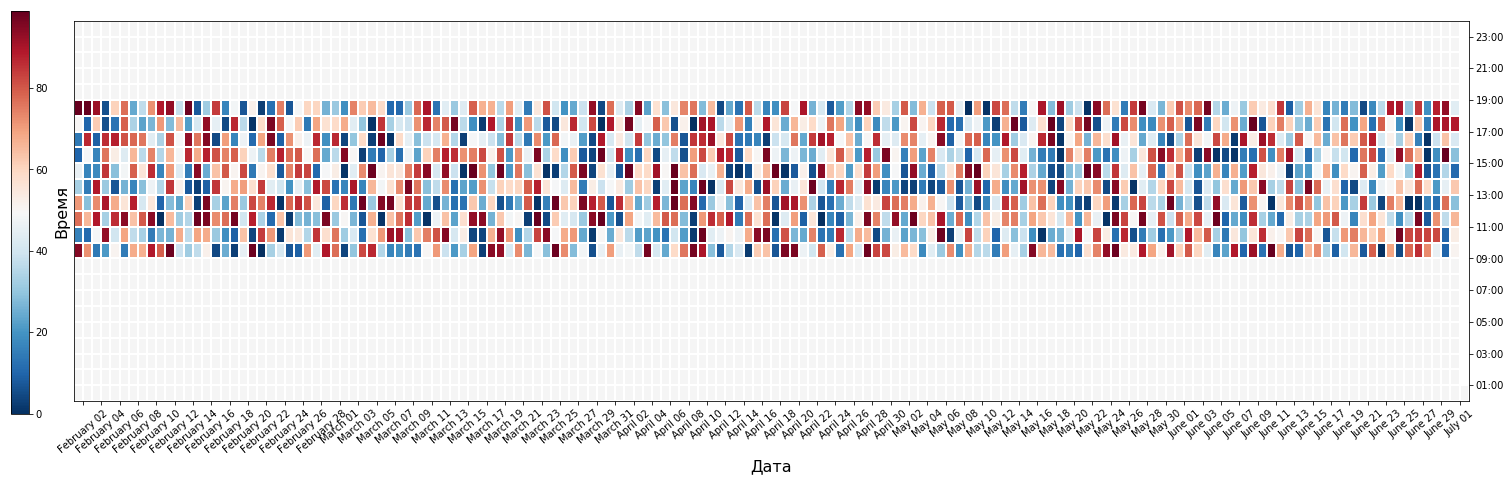

In [3]:
# Сигнатура функции и пример вывода:

intraday_ts = pd.Series(np.random.randint(0, 100, 3625), 
                        index=pd.date_range('2020-02-01', '2020-07-01', freq='H'))
intraday_ts.loc[(intraday_ts.index.hour < 9) | (intraday_ts.index.hour > 18)] = np.nan
figsize = (25, 7)


plot_intraday_ts(intraday_ts, figsize)

In [10]:
intraday_ts = pd.Series(np.random.randint(0, 100, 3625), 
                        index=pd.date_range('2020-02-01', '2020-07-01', freq='H'))
intraday_ts.loc[(intraday_ts.index.hour < 9) | (intraday_ts.index.hour > 18)] = np.nan
figsize = (25, 7)

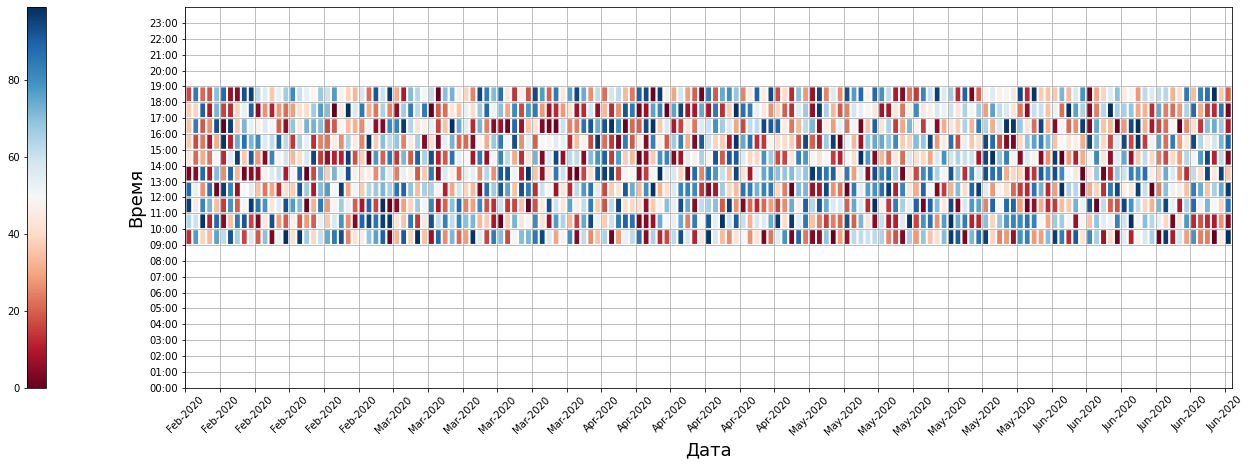

In [157]:
def plot_intraday_ts(intraday_ts, figsize):
    data = np.array(intraday_ts)
    data = data[:-1].reshape(int((3625-1)/24),24)
    data = data.T
    cmap = plt.cm.coolwarm(np.linspace(0, 1, 100))
    
    plt.figure(figsize=figsize)
    ax = plt.gca()
    c= ax.pcolor(data, cmap='RdBu',edgecolors='white', linewidths=2)
    plt.grid(True)

    plt.ylabel('Время', fontsize=18)
    plt.xlabel('Дата', fontsize=18)
    
        
    cb = plt.colorbar(c ,ax = [ax], location = 'left')
    frequency = 5
    plt.xticks(np.arange((3625-1)/24)[::frequency], pd.date_range('2020-02-01', '2020-07-01', freq='D')[:-1][::frequency].strftime('%b-%Y'),rotation=45)
    plt.yticks(np.arange(24), [ str(i).rjust(2,'0') + ':00' for i in np.arange(24)])
   
    
    plt.show()
    

plot_intraday_ts(intraday_ts, figsize)